# Part 1

## Loading the dataset

In [198]:
'''
This cell contains all the libraries used in the execution of this program.
Although the libraries can be imported anytime in the middle of the code, it is good to keep them at the top.
'''
# Improt Pandas modules which allows importing data from various file formats such as csv, JSON, SQL, Excel.
import pandas as pd   # Here, 'pd' is an alias and will be used instead of 'pandas' in the program.

import numpy as np   # NumPy is a powerful module used for numerical analysis of data.
from sklearn.preprocessing import LabelEncoder   # This will be used to encode the categorical data of 'diagnosis' column.

import io  # IO modules which helps in file-related input-ouput or reading-writing operations.
import requests # Requests module allows to read data from URLs or HTTP links

import matplotlib.pyplot as plt  # This will be used to plot charts.
import seaborn as sns            # This will also be used to plot charts.
from sklearn.metrics import confusion_matrix  # To create the confusion matrix for the selected models
from sklearn.svm import SVC



The data file and header file provided will be loaded in the Notebook.
The dataframe does not currently have a header hence, the header file will be attached to the dataframe.

The data and headers can be either be downloaded from Github in .csv formats and loaded with the code or it can be fetched directly from the URL as can be seen in the below two codes.

In [3]:
Data1 = "https://gist.githubusercontent.com/jeff-boykin/b5c536467c30d66ab97cd1f5c9a3497d/raw/5233c792af49c9b78f20c35d5cd729e1307a7df7/breast-cancer.csv"
Data2 = "https://gist.githubusercontent.com/jeff-boykin/b5c536467c30d66ab97cd1f5c9a3497d/raw/5233c792af49c9b78f20c35d5cd729e1307a7df7/field_names.txt"

# Data1 here is the breast cancer data and Data2 is the headers data.
# The cell will show no output as we are just reading the data from URLs.

In [4]:
# Getting contents from the variables which are URLs and saving them as new variables or dataframes.
data1 = requests.get(Data1).content
data2 = requests.get(Data2).content  

In [34]:
# Printing the data
data1
data2

# To print the dataframes one by one, we can either executive each line separately or use print(). 

b'ID\ndiagnosis\nradius_mean\nradius_sd_error\nradius_worst\ntexture_mean\ntexture_sd_error\ntexture_worst\nperimeter_mean\nperimeter_sd_error\nperimeter_worst\narea_mean\narea_sd_error\narea_worst\nsmoothness_mean\nsmoothness_sd_error\nsmoothness_worst\ncompactness_mean\ncompactness_sd_error\ncompactness_worst\nconcavity_mean\nconcavity_sd_error\nconcavity_worst\nconcave_points_mean\nconcave_points_sd_error\nconcave_points_worst\nsymmetry_mean\nsymmetry_sd_error\nsymmetry_worst\nfractal_dimension_mean\nfractal_dimension_sd_error\nfractal_dimension_worst'

In [35]:
# The above output is not in a tabular format, we will use read_csv() and decode it the data using Pandas module.
BreastCancer = pd.read_csv(io.StringIO(data1.decode('utf-8')), header = None, index_col = None)
Headers = pd.read_csv(io.StringIO(data2.decode('utf-8')), header = None, index_col = None)

#### An easier alternative could have been to download the data in the working dictionary and then load it in the program.

In [36]:
# Make sure what is the working directory. If using Jupyter Notebook, it's always better to upload
# the daatasets in the same folder in which your Notebook is saved.
bc = pd.read_csv('breast-cancer.csv',header=None)
Headers = open("field_names.txt", 'r').read().split('\n')

## Adding column headers to the dataset

Since the actual dataset has no columns headers and the header names are in a separate file, the two files needs to be combined in such a way that the header names goes at the top of the BreastCancer dataset.

In [37]:
bc.columns = Headers   # .columns has been used to add the column names from the Headers dataset.
bc.columns             # Prints the columns of the data
bc                     # A variable can be called/printed without print() function. 

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


The 2nd column - 'diagnosis' is our dependent variable which tells which patient has breast cancer and which hasn't. The datapoint 'M' stands ofor Malignant and means the cell is cancerous and 'B' means the cell is Bening i.e. not cancerous.
The value in the this column is based on the values in all other columns which can be called as independent variables.

The data is now ready for further transformation and analysis. It contains various parameters to show the cancer tumor's shape and geometry.

## Understanding the data and its structure

In [17]:
bc.shape     # .shape returns the number of rows and columns in the dataset.
bc.head()    # .head() returns the top 5 rows by default
bc.head(10)  # To print the top 10 rows of the dataset.
bc.tail()    # Prints the bottom 5 rows of the data

# To print the output of all three above codes together, use print() for each one of them. 

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [28]:
# In the previous print commands, all column names are not showing up. We can get all columns by using 'display.max_column' and Panda module.
with pd.option_context('display.max_columns', bc.shape[1]):
    display(bc.head())

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
# Is there any null value or empty record in the data?
bc.isnull().sum()   # isnull() looks for empty or null records.

ID                            0
diagnosis                     0
radius_mean                   0
radius_sd_error               0
radius_worst                  0
texture_mean                  0
texture_sd_error              0
texture_worst                 0
perimeter_mean                0
perimeter_sd_error            0
perimeter_worst               0
area_mean                     0
area_sd_error                 0
area_worst                    0
smoothness_mean               0
smoothness_sd_error           0
smoothness_worst              0
compactness_mean              0
compactness_sd_error          0
compactness_worst             0
concavity_mean                0
concavity_sd_error            0
concavity_worst               0
concave_points_mean           0
concave_points_sd_error       0
concave_points_worst          0
symmetry_mean                 0
symmetry_sd_error             0
symmetry_worst                0
fractal_dimension_mean        0
fractal_dimension_sd_error    0
fractal_

The above output shows no null value in any record hence, no treatment of missing values required. 
However, the last column is blank and has no name. Hence, the last column will be removed using drop().

In [40]:
# Removing the empty column.
bc = bc.dropna(axis=1)    # Axis = 1 has been used to drop the records by a column.

In [42]:
# Checking the data types of each column
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          569 non-null    int64  
 1   diagnosis                   569 non-null    object 
 2   radius_mean                 569 non-null    float64
 3   radius_sd_error             569 non-null    float64
 4   radius_worst                569 non-null    float64
 5   texture_mean                569 non-null    float64
 6   texture_sd_error            569 non-null    float64
 7   texture_worst               569 non-null    float64
 8   perimeter_mean              569 non-null    float64
 9   perimeter_sd_error          569 non-null    float64
 10  perimeter_worst             569 non-null    float64
 11  area_mean                   569 non-null    float64
 12  area_sd_error               569 non-null    float64
 13  area_worst                  569 non

Notice that the datatype of 'diagnosis' column is 'object'. Soon, this will be decoded into numbers (1 & 2) to make the analysis easier.

Depening on their shape and geometry, tumors are categorized in two groups:
 - Bening: Grow slowly and do not spread in the body.
 - Malignant: Grow fast, speard rapidly and destroy nearby healthy tissues.
 
 In the given dataset, the column 'Diagnosis' has the record of whether the tumor is Bening or Malignant. Let's have a look at the count of these two groups.

#### Checking the balance of the dependent variable

B    357
M    212
Name: diagnosis, dtype: int64


C:\Users\prana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

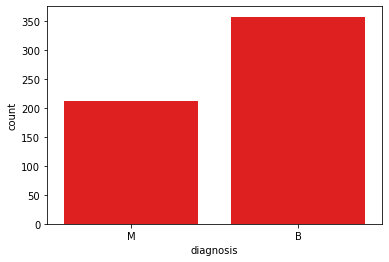

In [54]:
# Getting the frequency or count of Benign and Malignant patients.
print(bc['diagnosis'].value_counts())

# The frequency can be visualized using seaborn module 
sns.countplot(bc['diagnosis'], color = 'red')    # sns is the alias for imported seaborn module which we imported at the beginning.

The above output shows that there are 357 rows of data where the patients' cells are Benign or who do not have cancer. Similarly, there are 212 patients who have cancer.

Since the data type of 'diagnosis' was of 'object' data type as it contains categorical data, it needs to be encoded to numbers using sklearn library which has already been imported.

In [ ]:
# Encode categorical values from 'diagnosis' column
newlabel = LabelEncoder()   # newlabel is a variable
newlabel.fit_transform(bc.iloc[:,1].values)   # fit_transform will transform the 1st index location in bc dataframe as per newlabel and take all rows (:)

# The output will be in the form of an array with the above method.
# The values M will be replaced by 1 and B will be replaced by 0.

In [58]:
# Save the encoded values in the dataframe
bc.iloc[:,1] = newlabel.fit_transform(bc.iloc[:,1].values)

In [60]:
# Statistical description of the data
bc.describe()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Computing the mean and median smoothness and compactness of the two tumors

In [66]:
#Calculating smoothness and compactness of the mean
mean_smoothness=bc.groupby('diagnosis')['smoothness_mean'].mean()

print('Mean Smoothness:')
print(mean_smoothness)
print()                         # Prints empty line. \n can also be used for new line in a print commmand.

mean_compactness=bc.groupby('diagnosis')['compactness_mean'].mean()
print(r'Mean Compactness:')
print(mean_compactness)

Mean Smoothness:
diagnosis
0    2.000321
1    4.323929
Name: smoothness_mean, dtype: float64

Mean Compactness:
diagnosis
0    0.021438
1    0.032281
Name: compactness_mean, dtype: float64


In [69]:
#Calculating smoothness and compactness of the median
median_smoothness=bc.groupby('diagnosis')['smoothness_mean'].median()

print(r'Median Smoothness:')
print(median_smoothness)
print()

median_compactness=bc.groupby('diagnosis')['compactness_mean'].median()
print(r'Median Compactness:')
print(median_compactness)

Median Smoothness:
diagnosis
0    1.8510
1    3.6795
Name: smoothness_mean, dtype: float64

Median Compactness:
diagnosis
0    0.01631
1    0.02859
Name: compactness_mean, dtype: float64


The output shows that the mean and median of smoothness_mean of malignant tumors are approx. twice as large as those of the bening tumors. Also, the mean and median of compactness_mean are almost 1.5 times than those of beningn tomors.

This teels that the data is positively skewed which can be visualized used histogram plots for these two analysis.

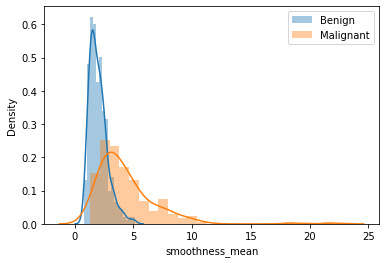

In [122]:
# Histogram plot for the smoothness_mean of the two tumors

sns.distplot(bc.loc[bc['diagnosis']==0]['smoothness_mean'], label='Benign')
sns.distplot(bc.loc[bc['diagnosis']==1]['smoothness_mean'], label='Malignant')
plt.legend()

import warnings
warnings.filterwarnings("ignore")

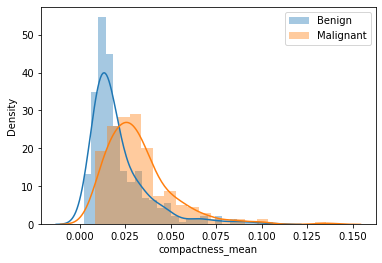

In [123]:
# Histogram plot for the compactness_mean of the two tumors

sns.distplot(bc.loc[bc['diagnosis']==0]['compactness_mean'], label='Benign')
sns.distplot(bc.loc[bc['diagnosis']==1]['compactness_mean'], label='Malignant')
plt.legend()

import warnings
warnings.filterwarnings("ignore")

The smoothness output and the histograms show that about 37% of the datapoints in diagnosis column is for Malignant. Since there is no massive imbalance in the data, the machine learning models on this dataset can be expected to be reliable.

### Function to generate bootstrap sample of the data

Bootstrapping in Python is a type of resampling where large numbers of smaller samples of the same size are repeatedly drawn, with replacement, from a single original sample.

##### Why bootstapping is done?
Each time we run our code to estimate the mean of a population from a given sample, the output will change as the execution of the code will generate new sample. The may cause our model to 'overfit' which we try to avoid by using bootstrap samples.

In [82]:
def bts(dataset, number_of_samples):    # def is used to define a function and the colon (:) sets its scopre.
    btsample=dataset.sample(replace=True, n=number_of_samples) 
    return btsample

sample1 = bts(bc,10)   # An example of the sample of 10 records from the data using bootstrap sampling method
display(sample1)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
368,9011971,1,21.71,17.25,140.90,1546.0,0.09384,0.08562,0.116800,0.084650,...,30.75,26.44,199.50,3143.0,0.13630,0.16280,0.28610,0.18200,0.2510,0.06494
332,897132,0,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,...,11.98,25.78,76.91,436.1,0.14240,0.09669,0.01335,0.02022,0.3292,0.06522
308,893526,0,13.50,12.71,85.69,566.2,0.07376,0.03614,0.002758,0.004419,...,14.97,16.94,95.48,698.7,0.09023,0.05836,0.01379,0.02210,0.2267,0.06192
290,89143602,0,14.41,19.73,96.03,651.0,0.08757,0.16760,0.136200,0.066020,...,15.77,22.13,101.70,767.3,0.09983,0.24720,0.22200,0.10210,0.2272,0.08799
372,9012795,1,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.193200,0.125500,...,22.69,21.84,152.10,1535.0,0.11920,0.28400,0.40240,0.19660,0.2730,0.08666
113,864292,0,10.51,20.19,68.64,334.2,0.11220,0.13030,0.064760,0.030680,...,11.16,22.75,72.62,374.4,0.13000,0.20490,0.12950,0.06136,0.2383,0.09026
546,922577,0,10.32,16.35,65.31,324.9,0.09434,0.04994,0.010120,0.005495,...,11.25,21.77,71.12,384.9,0.12850,0.08842,0.04384,0.02381,0.2681,0.07399
272,8910988,1,21.75,20.99,147.30,1491.0,0.09401,0.19610,0.219500,0.108800,...,28.19,28.18,195.90,2384.0,0.12720,0.47250,0.58070,0.18410,0.2833,0.08858
245,884437,0,10.48,19.86,66.72,337.7,0.10700,0.05971,0.048310,0.030700,...,11.48,29.46,73.68,402.8,0.15150,0.10260,0.11810,0.06736,0.2883,0.07748
354,901011,0,11.14,14.07,71.24,384.6,0.07274,0.06064,0.045050,0.014710,...,12.12,15.82,79.62,453.5,0.08864,0.12560,0.12010,0.03922,0.2576,0.07018


## Exploratory data analysis

In [93]:
# sns.pairplot(bc.iloc[:,1:31], hue='diagnosis')

In [187]:
# sns.pairplot(bc, hue="diagnosis")

In [87]:
# Getting the correlation of the attributes
bc.corr()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
ID,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
radius_sd_error,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
radius_worst,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
texture_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
texture_sd_error,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
texture_worst,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
perimeter_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
perimeter_sd_error,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


#### Identifying the variables that could predict a malignant tumor

In [98]:
varcorrel=(bc.iloc[:,1:].corr(method='pearson')).iloc[:,0].to_frame()
varcorrel

,diagnosis
diagnosis,1.000000
radius_mean,0.730029
radius_sd_error,0.415185
radius_worst,0.742636
texture_mean,0.708984
texture_sd_error,0.358560
texture_worst,0.596534
perimeter_mean,0.696360
perimeter_sd_error,0.776614
perimeter_worst,0.330499


The Person correlation coffiecients in the above output shows the dependency of 'diagnosis' on all other features which are independent variables. For the prurpose of prediction in the 'diagnosis' column, only those features should be taken forward which have high linear relationship with the dependent variable - diagnosis.
Hence, the variables with 70% or more dependency impact or those who have coefficients >= 0.7 or <= -0.7 will be considered significant for the prediction.

In [103]:
# Variables with correlation >= 0.7 with the dependent variable
pred_features=[]
positive_corr=list(varcorrel.loc[:, 'diagnosis']>=0.7)
for i in range(len(positive_corr)):
    if positive_corr[i]== True:
        pred_features.append(varcorrel.index[i])
    else:
        pass
pred_features

['diagnosis',
 'radius_mean',
 'radius_worst',
 'texture_mean',
 'perimeter_sd_error',
 'concavity_worst',
 'concave_points_sd_error',
 'concave_points_worst',
 'fractal_dimension_mean']

In [108]:
# Variables with correlation <= 0.7 with the dependent variable
negative=[]
negative_corr=list(varcorrel.loc[:, 'diagnosis']<=-0.7)
for i in range(len(negative_corr)):
    if negative_corr[i]== True:
        negative.append(varcorrel.index[i])
    else:
        pass
negative

[]

The above cell didn't produce any output as there is no variable in the dataset which has a significantly negative correlation with the dependent variable. However, looking at the positive correlation, the independent variables on which 'diagnosis' is highly dependent and can be used to predict the malignant tumors are:
 1. diagnosis (The dependent variable iteself. Can be ignored.)
 2. radius_mean
 3. radius_worst
 4. texture_mean
 5. perimeter_sd_error
 6. concavity_worst
 7. concave_points_sd_error
 8. concave_points_worst
 9. fractal_dimension_mean

<AxesSubplot:>

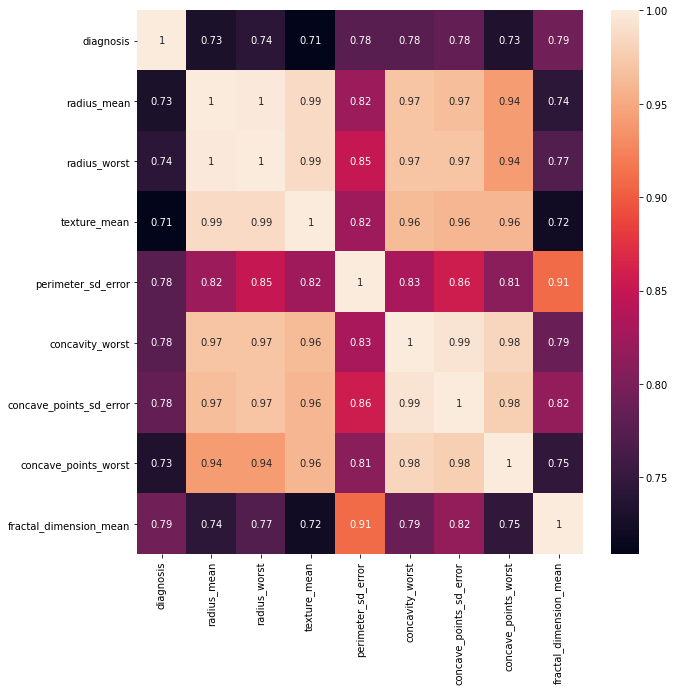

In [111]:
# The above correlation can be visualized through a heatmap
heatmapped=bc.iloc[:,1:].corr(method='pearson').loc[positive_corr,positive_corr]
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(heatmapped, annot=True)

In [117]:
# The 9 independent variables with significant (>=70%) pearson correlation cofficients.
sorted_corr = bc.drop("ID", axis = 1).corr()["diagnosis"].sort_values(ascending=False).head(9)
sorted_corr

diagnosis                  1.000000
fractal_dimension_mean     0.793566
concave_points_sd_error    0.782914
perimeter_sd_error         0.776614
concavity_worst            0.776454
radius_worst               0.742636
concave_points_worst       0.733825
radius_mean                0.730029
texture_mean               0.708984
Name: diagnosis, dtype: float64

The values/coefficients closer to 1 shows the high dependency of the dependent variable on the independent ones. Apart from the variable 'disgnosis', all other variables can be used to predict whether a given record is results into cancerous or not.

## Data Modelling
Build a model to predict the malignant tumors:
- Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.
- Identify how you would control for overfitting in each classification technique.
- Evaluate the performance of each model.
- In each model, identify the most important predictive variables and explain how you identified them.

In [132]:
# Before splitting the data, let's define the independent and dependent variables.
X = bc[pred_features].drop('diagnosis', axis =1)    # Independent variables - All columns among significant features except for diagnosis.
Y = bc['diagnosis']       # Dependent variable - index# 1

X
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [134]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)  # seed = 42 so that the prediction can be replicated.

There are various machine learning models used for the classification purposes such as Random Forest Classifier, Logistic Regression, Support Vector Machines, kNN classifier, GaussianNB and Decision Tree. 

In this analysis, however, Logistic Regression, Random Forest Classifier, SVM and Decision Tree classifier will be used. The result from these four techniques will be compared on various parameters to choose the best method to predict whether a patient has breast cancer or not.

In [138]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)

#print model accuracy on the training data.
print('Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  

Logistic Regression Training Accuracy: 0.9371859296482412


In [149]:
# Instead of creating the four models separately, let's create them all under one function which print their respective accuracies.

def datamodels(X_train, Y_train):
    
    #Logistic Regression 
    from sklearn.linear_model import LogisticRegression
    logis = LogisticRegression(random_state = 0)
    logis.fit(X_train, Y_train)
    
    # Random Forest Classifier with ensemle class
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    rfc.fit(X_train, Y_train)
    
    #Using Linear Support Vector Classification
    from sklearn.svm import SVC
    svm = SVC(kernel = 'linear', random_state = 0)
    svm.fit(X_train, Y_train)

    #Using DecisionTreeClassifier 
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    dtc.fit(X_train, Y_train)
    
    # Printing the accuracy of the models
    print('Logistic Regression Accuracy:', logis.score(X_train, Y_train))
    print('Random Forest Accuracy:', rfc.score(X_train, Y_train))
    print('SVM Linear Accuracy:', svm.score(X_train, Y_train))
    print('Decision Tree Accuracy:', dtc.score(X_train, Y_train))
  
    return logis, rfc, svm, dtc

#### Accuracy of the models on training data

In [150]:
# The defined function can be called to print the accuracies of the models on training data.
model = datamodels(X_train, Y_train)

Logistic Regression Accuracy: 0.9371859296482412
Random Forest Accuracy: 0.9949748743718593
SVM Linear Accuracy: 0.9396984924623115
Decision Tree Accuracy: 1.0


Looking at the accuracy of the 4 models, it can be said that Decision Tree classifer has performed best with the accuracy of 100%. It is followed by Random Forest (99.4%), Logistic Regression (93.7%) and then SVM Linear classifier being at last with 93.9% accuracy.

#### Testing the model on test data

In [158]:
# Testing model accuracy on test data using confusion matrix
confmat = confusion_matrix(Y_test, model[0].predict(X_test))     # Index 0 is for the logistic regression model in the function created previously.

print(confmat)

TruePos = confmat[0][0]
TrueNeg = confmat[1][1]
FalseNeg = confmat[1][0]
FalsePos = confmat[0][1]

print("Accuracy = ", (TruePos + TrueNeg)/(TruePos + TrueNeg + FalseNeg + FalsePos))

[[107   1]
 [  3  60]]
Accuracy =  0.9766081871345029


Confusuon matrix in the above cell can tell the number of patients each model misdiagnosed. For example, if is a cancer patient and the confusion matric of a model shows that it is cancer case or not.

The four numbers in the above confusion matric output can be interpreted as:
- False Negative  (3) - Cancer is there, but the prediction says no cancer.
- True Positive (60) - Also called 'sensitivety', it measures the proportion of actual positive that are identified correctly. Cancer is there in actual as well as prediction.
- True Negative (107) - Also known as 'specificity', it measures the proportion of actual negatives that are correctly identified. Actual as well as predicted values are same.
- False Positive (1) - No cancer, but the prediction say there is cancer.

##### Accuracy of logistic regression on test data = 97.6%


#### Let's get accuracy, precision and recall of the confusion matrices for the four models.

While recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant. 
Accuracy tells us how accurate the model can predict the outputs is given a new set of data.

In [173]:
for i in range(len(model)):
  confmat = confusion_matrix(Y_test, model[i].predict(X_test))
  
  TrueNeg = confmat[0][0]
  TruePos = confmat[1][1]
  FalseNeg = confmat[1][0]
  FalsePos = confmat[0][1]
  
  print(confmat)
  print('Testing Accuracy of Model[{}] = "{}!"'.format(i,  (TruePos + TrueNeg)/(TruePos + TrueNeg + FalseNeg + FalsePos)))
  print('Precision= ',(TruePos)/(TruePos + FalsePos))
  print('Recall = ', (TruePos)/(TruePos + FalseNeg))
  
  print("\n")

[[107   1]
 [  3  60]]
Testing Accuracy of Model[0] = "0.9766081871345029!"
Precision=  0.9836065573770492
Recall =  0.9523809523809523


[[106   2]
 [  5  58]]
Testing Accuracy of Model[1] = "0.9590643274853801!"
Precision=  0.9666666666666667
Recall =  0.9206349206349206


[[108   0]
 [  3  60]]
Testing Accuracy of Model[2] = "0.9824561403508771!"
Precision=  1.0
Recall =  0.9523809523809523


[[103   5]
 [  4  59]]
Testing Accuracy of Model[3] = "0.9473684210526315!"
Precision=  0.921875
Recall =  0.9365079365079365




#### Which model to select for the prediction?

Selecting the best model to predict the cancer in patients based on the above analysis would include inpterprating the accuracy, precision and recall values from the above output. It is an intuitive decision of the analysts which parameter they want to give more weightage to.

Based on the above output, I will select model 2 - Linear Support Vector Classification for the prediction as it has as it has highest accuracy, precision as well as recall. In its confusion matric too, there is no False Positive and it has highest True Negative and True Positive values.

In [183]:
# Print the prediction of SVM classifier and comparison of predicted values with the actual ones.

prediction = model[2].predict(X_test)
print(prediction)

print()
print(Y_test)

[0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]

204    0
70     1
131    1
431    0
540    0
      ..
69     0
542    0
176    0
501    1
247    0
Name: diagnosis, Length: 171, dtype: int32


#### Analyzing the data with AUC, St. Dev. using Support Vector Machine

Now that SVM is best performing model, let's try another appraoch for the analysis using cross-validation and Area Under Curce (AUC) and Standard Deviation of the data. At the end, the 'feature importance' will also be performed.

In [230]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

svml = SVC(kernel="linear")

# Doing 3 trials of 5 fold Cross Validation
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
# create model
model = svml
# evaluate model
scores = cross_val_score(model, X_train, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# report performance
print('Average AUC over 3 trials of 5 fold Cross Validation is: %.3f  with a std deviation of %.3f' % (mean(scores), std(scores)))


Average AUC over 3 trials of 5 fold Cross Validation is: 0.977  with a std deviation of 0.020


In [231]:
svml.fit(X_train, Y_train)

SVC(kernel='linear')

In [232]:
Y_pred = svml.predict(X_test)


In [233]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_pred, Y_test)

0.9864864864864865

<AxesSubplot:>

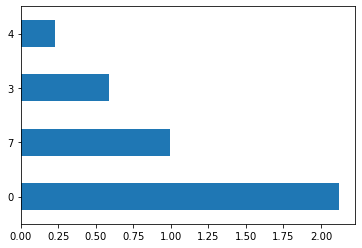

In [234]:
model_weights = abs(svml.coef_[0])

feat_importances = pd.Series(model_weights)
feat_importances.nlargest(4).plot(kind='barh')

## Summary

#### Specification of the model selected for predicting cancer cells in patients
Model/Technique name: Support Vector Machine (Linear)
- Accuracy = 98.2%
- Precision= 100%
- Recall =  95.2%


Important features for the prediction:
 - fractal_dimension_mean
 - texture_mean
 - concavity_worst
 - radius_worst

The AUC of the model = 98.6%


## Explanation

### Technical Audience
 - Objective: 
     The objective of this analysis was to used classification methods to predict whether a given patient has cancer or not. Since the dataset was too small, we cannot be sure that the finally selected model (SVM-Linear) should been practically used. A similar analysis with much bigger dataset can be performed before taking the decision.
     
 - Observations:
     - Of the 31 features in the dataset, 'diagnosis' was used as dependent variable while other 30 were independent ones. However, before creating the model, only 9 independent variables were selected based on higher person coefficient. Interestingly, none of the variables had significantly negative correlation with the dependent variable.
     - Of the four classification models used - Logistic regression, Random Forest, SVM-Linear and Decision Tree, the 3rd model performed best with 100% precision, 98.2% accuracy and 95.2% recall values. The True Positive and True Negative values for this method is also highest among that of other models.
     
 - Scope of Improvements:
     - Given more time, other classification methods could also be deployed on the data and their accuracy could also be compared. 
     - The model is slightly imbalanced due to the higher number of Benign values in the dependent column. Techniques such as SMOTE could be used on the dataset make the balance between the counts of Malignant and Benign values.
     - The model performance can be optimized using some feature selection techniques and optimizing the hyperparameters.
     

### Non-technical Audience
 - Objective:
     The analysis tried to predict whether a person has cancer or not based on various factors related to the measurement of patients tissue cells.
 - Method:
     Classification methods were used for the analysis which identify and learn the patterns in the data based on which it tells if the new cell measurements are of a cancerous cell or not. 
 - Analysis:
     - Based on the model, 98.2% times the actual and predicted values will match and hence, we can say the model is reliable.
     - The model also identifies the important variables or factors which can help us determine whether a person has cancer or not. To do so, we can analyze the values for fractal_dimension_mean, texture_mean, concavity_worst and radius_worst. It can also be said that larger the values in these column, the higher is the chance for a person to have cancer.
   

# Part 2

## Student-Sample-1


### Code
- The imports have been done in the middle of the codes. Although not incorrect, it's ideal to import all modules and libraries at the beginning.
- Incorrect import of module for LinearRegression. It should have been done using sklearn.linear_model.
- cross_val_score has been imported twice. No need to import a module more than once in a program.
- Import for cross_val_score is incorrect. It should have been "from sklearn.model_selection import cross_val_score"
- Name Erorr for 'data would show up when running the program as it is not defined anywhere. Looks like the user created variable 'd', but used 'data' instead.
- Defining x1 and x2 would shop up Name Errors for 'data' if not replaced with 'd'.
- Very few comments added. It's always good to add enough comments for the reader to understand the code.
- train_test_split is imported, but never used. If no use, prefer not to import the modules.
- Scoring method used in the code is not a valid one. 'neg_mean_absolute_error' could have been a better choice.
- The value of 'scores' and 'scores.mean' will be same.
- Unwanted modules should not be imported.

### Methodology
- Prefer to maintain a good variable naming convention. Readers should read your variable name and should be able to understand what it refers to. Names such as 'd' as used in the code could have been avoided.
- For easier readibility, add comments in each cell or lines which need explanation.
- The program lacks pre-processing of data before moving to data modeling and prediction. An analyst must make sure the data is clean, balanced and unbaised before proceeding with the models.

### Conceptual Understanding
- Be aware of which new changes in the Python modules and libraries. 
- An standard process of data analysis is:
    - Data acquisition - This has been done by the student.
    - Data Exploration - This is missing from the program.
    - Data Preparation - This has also not been performed. There may be outliers or missing values.
    - Data Modelling & Evaluation- This has been done however, conceptual errors such as mainting the variable names and taking proper scoring method is missing.
    - Obervation & Discussion - No observation and discussion has been provided on the analysis. We must explain our methods and its results.
- Some of the mistakes are of basic level. You may want to spend some more time on practise and reach out to your trainer or mentor more frequently.

## Student-Sample-2

### Code
- Good attempt, overall. 
- No need to import modules which are not being used in the program such as numpy
- Add some comments for to help the reader understand what you are doing.
- cross_val_score has been imported from an old module. It is now in sklearn.model_selection.
- Although not incorrect, better to use Pandas writing style for bracket rather than SQL formats.
- Wrong scoring value. Should have taken 'neg_mean_absolute_error" instead.
- The value of 'scores' and 'scores.mean' will be same.

### Methodology
- For easier readibility, add comments in each cell or lines which need explanation.
- The dataset should have been explored and prepared before starting to create models. Any machine learning model created using unbiased or unclean data will be of no practical use.

### Conceptual Understanding
- Be aware of which new changes in the Python modules and libraries, and always use the latest modules.
- Follow the standard data analysis process. Clean your data, explore the data points and understand the correlation between variables before working on data models.
- The ContractType variable has a lot of null value and has been used as a predictor variable. In such a case, the analysis will be wrong. Use imputation to treat the missing values.
- When the data is categorical, such as in ContractType, then encoding should be done to give numerical labels to the datapoints.